x = 2.000, y ≈ 15.170177
x = 2.006, y ≈ 15.176177
x = 2.012, y ≈ 15.183135
x = 2.018, y ≈ 15.191029
x = 2.024, y ≈ 15.199836
x = 2.030, y ≈ 15.209534
x = 2.036, y ≈ 15.220102
x = 2.042, y ≈ 15.231519
x = 2.048, y ≈ 15.243765
x = 2.054, y ≈ 15.256818
x = 2.060, y ≈ 15.270660
x = 2.066, y ≈ 15.285272
x = 2.072, y ≈ 15.300634
x = 2.078, y ≈ 15.316728
x = 2.084, y ≈ 15.333537
x = 2.090, y ≈ 15.351042
x = 2.096, y ≈ 15.369227
x = 2.102, y ≈ 15.388073
x = 2.108, y ≈ 15.407566
x = 2.114, y ≈ 15.427689
x = 2.120, y ≈ 15.448426
x = 2.126, y ≈ 15.469762
x = 2.132, y ≈ 15.491681
x = 2.138, y ≈ 15.514169
x = 2.144, y ≈ 15.537212
x = 2.150, y ≈ 15.560795
x = 2.156, y ≈ 15.584905
x = 2.162, y ≈ 15.609529
x = 2.168, y ≈ 15.634652
x = 2.174, y ≈ 15.660263
x = 2.180, y ≈ 15.686348
x = 2.186, y ≈ 15.712897
x = 2.192, y ≈ 15.739895
x = 2.198, y ≈ 15.767333
x = 2.204, y ≈ 15.795198
x = 2.210, y ≈ 15.823480
x = 2.216, y ≈ 15.852167
x = 2.222, y ≈ 15.881249
x = 2.228, y ≈ 15.910715
x = 2.234, y ≈ 15.940556


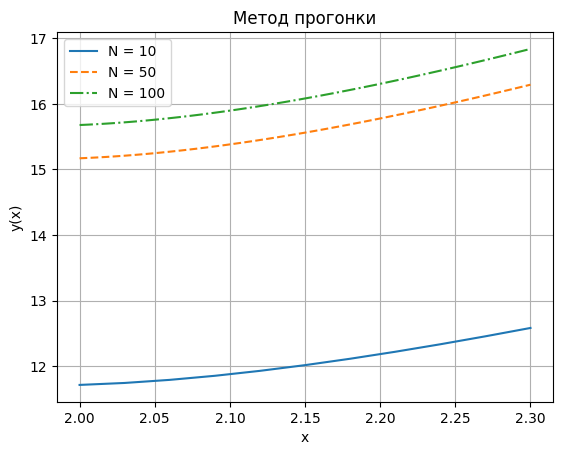

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def thomas_algorithm(a, b, c, d):
    n = len(b)
    c_prime = np.zeros(n-1)
    d_prime = np.zeros(n)

    c_prime[0] = c[0] / b[0]
    d_prime[0] = d[0] / b[0]

    for i in range(1, n-1):
        denom = b[i] - a[i] * c_prime[i-1]
        c_prime[i] = c[i] / denom
        d_prime[i] = (d[i] - a[i] * d_prime[i-1]) / denom

    d_prime[-1] = (d[-1] - a[-1] * d_prime[-2]) / (b[-1] - a[-1] * c_prime[-2])

    x = np.zeros(n)
    x[-1] = d_prime[-1]
    for i in range(n-2, -1, -1):
        x[i] = d_prime[i] - c_prime[i] * x[i+1]
    return x

def solve_bvp(N):
    x0, xN = 2.0, 2.3
    h = (xN - x0) / N
    x = np.linspace(x0, xN, N+1)

    a = np.zeros(N+1)
    b = np.zeros(N+1)
    c = np.zeros(N+1)
    d = np.zeros(N+1)

    # Левая граница: y'(2) = 1 -> -y_0 + y_1 = h
    b[0] = -1.0
    c[0] = 1.0
    d[0] = h

    # Внутренние узлы
    for i in range(1, N):
        xi = x[i]
        a[i] = 1/h**2 - xi/h
        b[i] = -2/h**2 - 2
        c[i] = 1/h**2 + xi/h
        d[i] = 0.6

    # Правая граница: 0.4y_N - y'(x_N) = 1 → (1/h)y_{N-1} + (0.4 - 1/h)y_N = 1
    a[N] = 1/h
    b[N] = 0.4 - 1/h
    d[N] = 1.0

    y = thomas_algorithm(a, b, c, d)
    return x, y


class LabeledFunValue:
    def __init__(self, x, y, label):
        self.x = x
        self.y = y
        self.label = label


def generate_line_styles(num_functions):
    line_styles = ['-', '--', '-.', ':']
    styles = []

    for i in range(num_functions):
        style = line_styles[i % len(line_styles)]
        styles.append(style)

    return styles


def visualize_funs(title: str, *fun_value: LabeledFunValue):
    line_styles = generate_line_styles(len(fun_value))

    for i, fun in enumerate(fun_value):
        plt.plot(fun.x, fun.y, line_styles[i], label=fun.label)
        plt.xlabel('x')
        plt.ylabel('y(x)')
        plt.title(title)
        plt.grid(True)
        plt.legend()

    plt.show()


N = 50
x_vals, y_vals = solve_bvp(N)
for xi, yi in zip(x_vals, y_vals):
    print(f"x = {xi:.3f}, y ≈ {yi:.6f}")

n_list = [10, 50, 100]
fun_list: list[LabeledFunValue] = []

for n in n_list:
    x, y = solve_bvp(n)

    fun_list.append(LabeledFunValue(x, y, f'N = {n}'))

visualize_funs('Метод прогонки', *fun_list)

